In [1]:
import numpy as np
import pandas as pd

import os
import sys
sys.path.insert(0, '..')
import ccal

%matplotlib inline
# %config InlineBackend.figure_formats = {'svg',}

==================== Computational Cancer Analysis Library ====================
<14:29:59> Checking library dependencies ...
<14:29:59> Using the following libraries (in addition to the Anaconda libraries):
<14:29:59> 	scipy (v0.18.0)
<14:29:59> 	statsmodels (v0.6.1)
<14:29:59> 	scikit-learn (v0.17.1)
<14:29:59> 	seaborn (v0.7.1)
<14:29:59> 	rpy2 (v2.8.2)
<14:29:59> 	pandas (v0.18.1)
<14:29:59> 	matplotlib (v1.5.1)
<14:29:59> 	numpy (v1.11.1)
<14:29:59> Planted a random seed 20121020.


# Define states

In [2]:
h = ccal.support.read_gct('/home/cyborg/hematopoietic_cancer/result/ccle_hema_r/k9/ccle_hema_k_9_H.gct')
ks = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30]
n_clusterings = 10
filepath_prefix = 'output/ccle_hema_k_9_H_{}clustering'.format(n_clusterings)
# labels, memberships, cophenetic_correlation = ccal.analyze.define_states(h, ks, n_clusterings=n_clusterings,
#                                                                              filepath_prefix=filepath_prefix)
labels = pd.read_csv(filepath_prefix + '_labels.txt', index_col=0, sep='\t')
memberships = ccal.support.read_gct(filepath_prefix + '_memberships.gct')

# Make Onco-GPS

In [ ]:
ccal.support.VERBOSE = True

for n_components in [3, 4, 6, 9]:
    print('n_components:', n_components)
    for n_state in ks[::5]:
        print('n_state:', n_state)
        for annotation_type in ['continuous', 'categorical', 'binary']:
            print('annotation_type:', annotation_type)
            if annotation_type == 'continuous':
                annotations = np.random.random_sample(h.shape[1])
            elif annotation_type == 'categorical':
                annotations = np.random.choice(range(n_state), h.shape[1])
            elif annotation_type == 'binary':
                annotations = np.random.choice(range(2), h.shape[1])
            else:
                raise ValueError('Error in annotation_type.')
            ccal.onco_gps.make_map(h.iloc[:n_components, :],
                                   np.random.choice(list(range(1, n_state + 1)), h.shape[1]),
                                   annotations=annotations,
                                   annotation_type=annotation_type)

# Project samples

In [5]:
state = 12
states = labels.ix[state, :]

<14:18:21> Making Onco-GPS with 3 components and 166 samples ...
<14:18:21> '-0-' normalizing pandas object with axis=1 ...
<14:18:21> '0-1' normalizing pandas object with axis=1 ...
<14:18:21> Converting association to distance (1 - association) ...
<14:18:22> '0-1' normalizing pandas object with axis=0 ...
<14:18:22> Modeled columns by -2215.2866041910243e^(-9.588846672204936e-05x) + 2215.2531569915286.
<14:18:22> component_pulling_power = 1.000.


/home/cyborg/tool/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
../ccal/analyze.py:300: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  kdes[s] = asarray(kde[2])


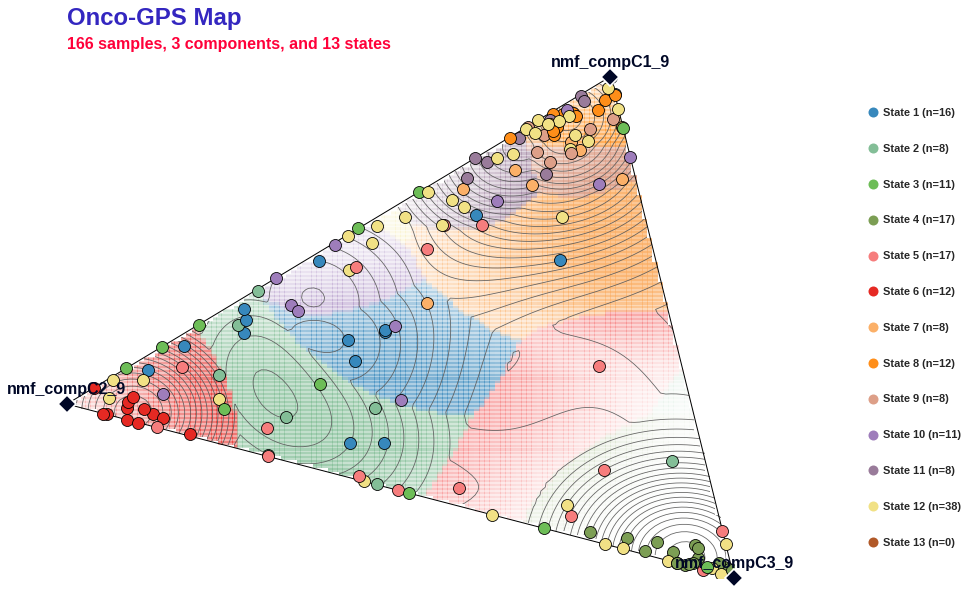

In [8]:
ccal.onco_gps.make_map(h, states)

<14:21:54> Making Onco-GPS with 3 components and 166 samples ...
<14:21:54> '-0-' normalizing pandas object with axis=1 ...
<14:21:54> '0-1' normalizing pandas object with axis=1 ...
<14:21:54> Converting association to distance (1 - association) ...
<14:21:55> '0-1' normalizing pandas object with axis=0 ...
<14:21:55> Modeled columns by -2215.2866041910243e^(-9.588846672204936e-05x) + 2215.2531569915286.
<14:21:55> component_pulling_power = 1.000.


/home/cyborg/tool/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
../ccal/analyze.py:300: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  kdes[s] = asarray(kde[2])


<14:21:55> Using samples from testing H matrix ...
<14:21:55> '-0-' normalizing pandas object with axis=1 ...
<14:21:55> '0-1' normalizing pandas object with axis=1 ...


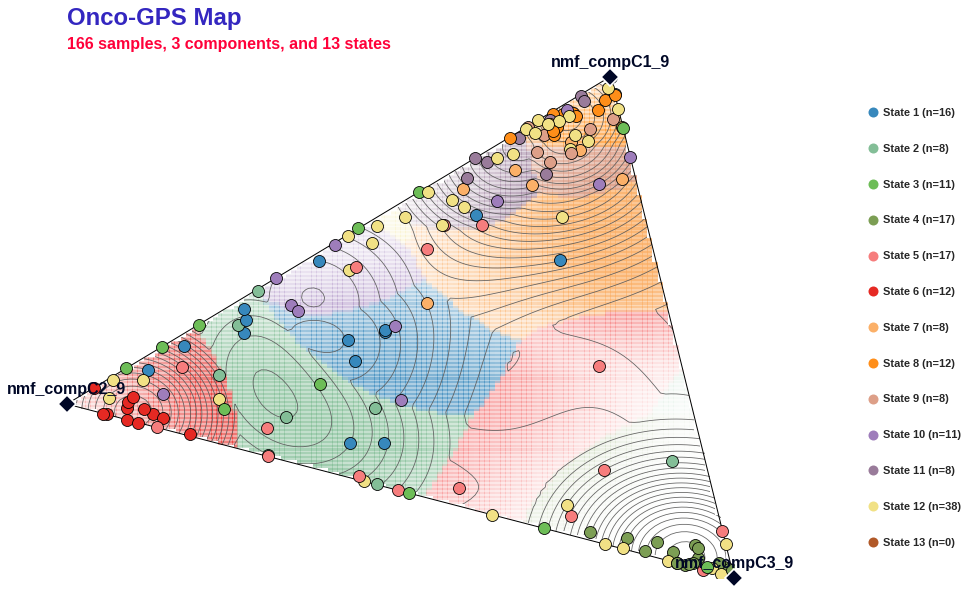

In [10]:
ccal.onco_gps.make_map(h, states, h_test=h, states_test=states)

<14:23:23> Making Onco-GPS with 3 components and 166 samples ...
<14:23:23> '-0-' normalizing pandas object with axis=1 ...
<14:23:23> '0-1' normalizing pandas object with axis=1 ...
<14:23:23> Converting association to distance (1 - association) ...
<14:23:24> '0-1' normalizing pandas object with axis=0 ...
<14:23:24> Modeled columns by -2215.2866041910243e^(-9.588846672204936e-05x) + 2215.2531569915286.
<14:23:24> component_pulling_power = 1.000.


/home/cyborg/tool/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
../ccal/analyze.py:300: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  kdes[s] = asarray(kde[2])


<14:23:24> Using samples from testing H matrix ...
<14:23:24> '-0-' normalizing pandas object with axis=1 ...
<14:23:24> '0-1' normalizing pandas object with axis=1 ...


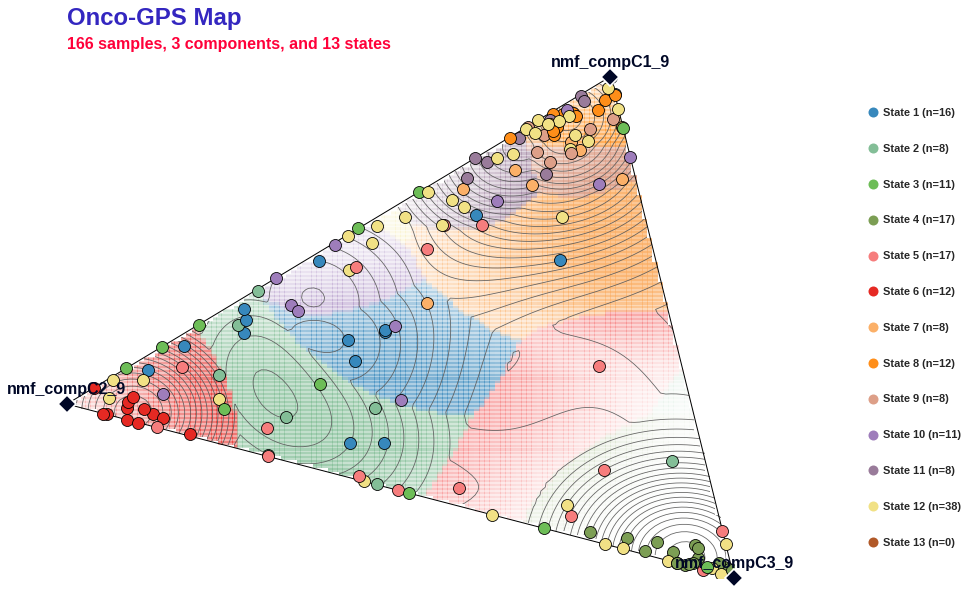

In [11]:
ccal.onco_gps.make_map(h, states, h_test=h, states_test=states, h_test_normalization='clip_and_0-1')

In [12]:
h_test = h.ix[:, :3]
states_test = states[: 3]
ccal.onco_gps.make_map(h, states, h_test=h_test, states_test=states_test, background_markersize=0, background_mask_markersize=0)

# Test real data

In [2]:
H = ccal.support.read_gct('/home/cyborg/Downloads/KRAS_Matrix.gct')

MEMBERSHIPS = pd.read_csv('/home/cyborg/Downloads/KRAS_membership.gct', sep='\t', index_col=0)
K17_MEMBERSHIPS = MEMBERSHIPS.ix[:, 'k_17']
K17_MEMBERSHIPS_INT = K17_MEMBERSHIPS.apply(lambda s: int(s[1:])).tolist()

<14:36:26> Making Onco-GPS with 9 components, 750 samples, and 17 states {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17} ...
<14:36:26> '-0-' normalizing pandas object with axis=1 ...
<14:36:26> '0-1' normalizing pandas object with axis=1 ...
<14:36:27> Converting association to distance (1 - association) ...
<14:36:30> '0-1' normalizing pandas object with axis=0 ...
<14:36:30> Modeled columns by 0.009092682289656087e^(0.5530317148959037x) + 0.018927689355700078.
<14:36:30> component_pulling_power = 2.106.


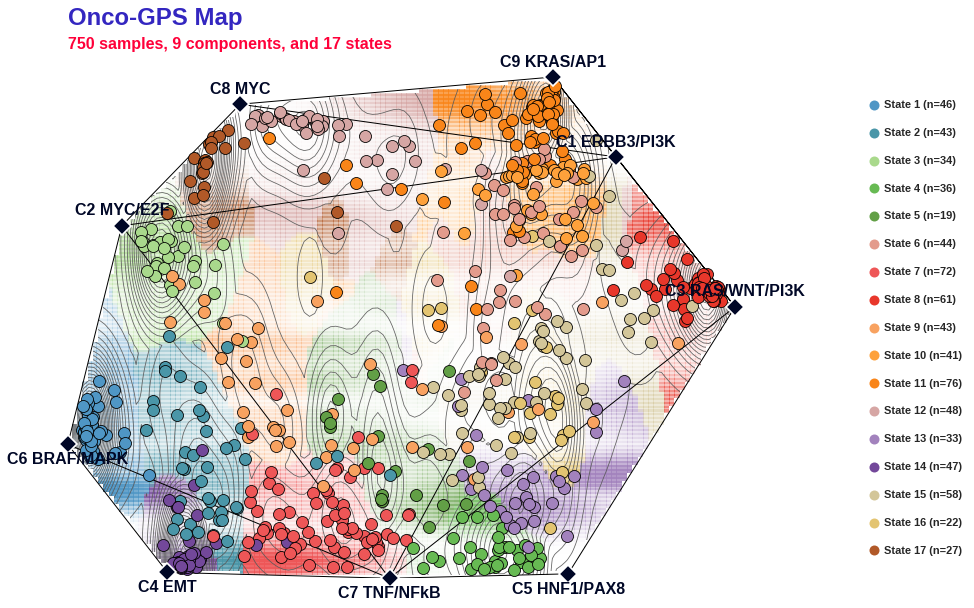

In [6]:
ccal.onco_gps.make_map(H, K17_MEMBERSHIPS_INT

In [4]:
RPKM = ccal.support.read_gct('/home/cyborg/data/ccle/ccle_rpkm.gct')

CD274_RPKM = RPKM.ix['CD274', :]
CD274_SAMPLES_IN_H = CD274_RPKM.index & H.columns
H_CD274 = H.ix[:, CD274_SAMPLES_IN_H]
K17_MEMNERSHIPS_CD274 = K17_MEMBERSHIPS.ix[CD274_SAMPLES_IN_H].apply(lambda s: int(s[1:])).tolist()

<14:30:44> Making Onco-GPS with 9 components, 750 samples, and 17 states {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17} ...
<14:30:44> '-0-' normalizing pandas object with axis=1 ...
<14:30:44> '0-1' normalizing pandas object with axis=1 ...
<14:30:44> Converting association to distance (1 - association) ...
<14:30:48> '0-1' normalizing pandas object with axis=0 ...
<14:30:48> Modeled columns by 0.009092682289656087e^(0.5530317148959037x) + 0.018927689355700078.
<14:30:48> component_pulling_power = 2.106.
<14:30:49> Focusing on samples from testing H matrix ...
<14:30:49> '-0-' normalizing pandas object with axis=1 ...
<14:30:49> '0-1' normalizing pandas object with axis=1 ...
<14:31:02> '-0-' normalizing pandas object with axis=all ...


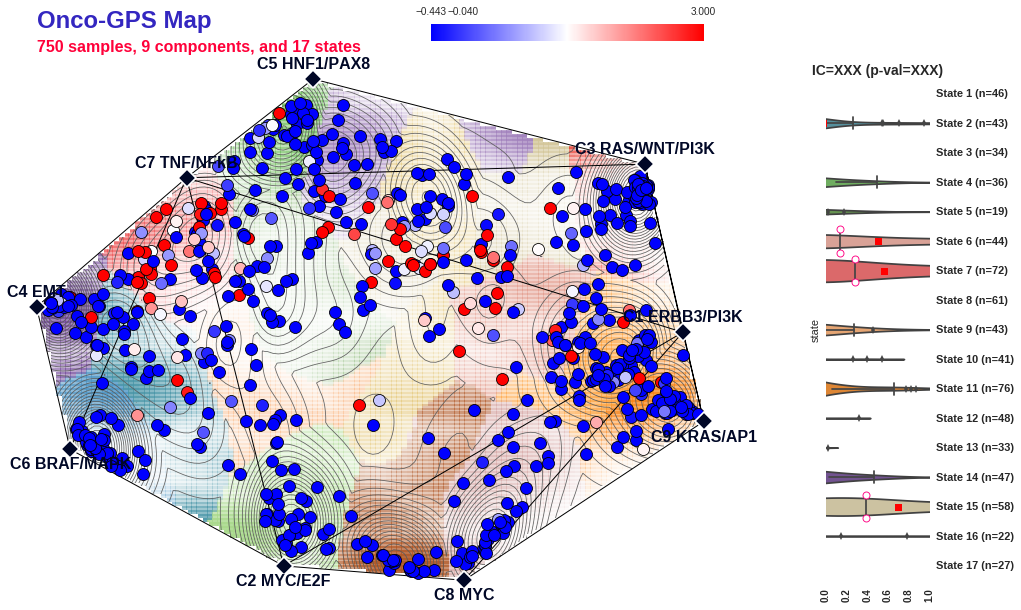

In [5]:
ccal.onco_gps.make_map(H, K17_MEMBERSHIPS_INT, h_test=H_CD274, states_test=K17_MEMNERSHIPS_CD274, annotations=CD274_RPKM.ix[H_CD274.columns])